In [1719]:
import scipy as sp
from scipy import sparse
import networkx as nx
from scipy.io import mmread
from numpy import linalg as LA
import numpy as np
import matplotlib.pyplot as plt
import heapq

In [1720]:
G = nx.read_edgelist("data.txt", nodetype=int, data=(("weight", int),))
G = nx.Graph(G)

In [1721]:
list(G.edges(data=True))

[(0, 1, {'weight': 4}),
 (0, 2, {'weight': 9}),
 (1, 2, {'weight': 2}),
 (1, 3, {'weight': 6}),
 (1, 4, {'weight': 2}),
 (2, 4, {'weight': 1}),
 (2, 3, {'weight': 1})]

In [1722]:
def print_graph(inp_graph, ct):
    pos = nx.spring_layout(inp_graph)
    nx.draw_networkx(inp_graph, pos)
    labels = nx.get_edge_attributes(inp_graph, 'weight')
    x = nx.draw_networkx_edge_labels(inp_graph, pos, edge_labels=labels)
    plt.show("filename" + str(ct) + ".png")

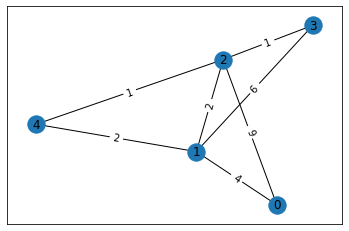

In [1723]:
# Initialize
input_graph = G
print_graph(input_graph, 0)
no_of_nodes = input_graph.number_of_nodes()
heap = [] # store as (node, g-value)
visited = []

In [1724]:
print(input_graph.number_of_nodes())
# print_graph(input_graph, 0)

5


In [1725]:
def kruskalAlgo(inp_graph):
    # stores the edges present in MST
    MST = []
    index = 0
    cost = 0
    ct = 0
    nodes = inp_graph.number_of_nodes()
    # temp graph
    graph = nx.Graph()
    # sort edges by increasing weight
    sorted_graph = sorted(inp_graph.edges(data=True), key=lambda item: item[2]['weight'])
    # MST contains exactly `V-1` edges
    i = 0
    while graph.number_of_nodes() != nodes:
        # consider the next edge with minimum weight from the graph
        (src, dest, weight) = sorted_graph[index]
        weight = weight.get('weight')
        index = index + 1
        # add edge
        graph.add_edge(src, dest, weight=weight)
        # check for cycle
        lst = nx.cycle_basis(graph.to_undirected())
        if len(lst) == 0:
            # consider the wt if no cycle
            cost = cost + weight
            # MST.append((src, dest, weight))
            # minimumCost = 0
            # N = nx.Graph()
            # print("Adding Src : " + str(src) + " Des : " + str(dest) + " Wt : " + str(weight))
            # for u, v, weight in MST:
            #     minimumCost += weight
            #     N.add_weighted_edges_from([(u, v, weight)])
            # print_graph(N, ct)
            # ct = ct + 1
        else:
            # discard the edge
            e = (src, dest, {"weight" : weight})
            graph.remove_edge(*e[:2])
        i += 1

        
    return graph, cost

In [1726]:
#works
def get_g_n(inp_graph, src, dest, parent_g_n):
    return inp_graph[src][dest].get('weight') + parent_g_n

In [1727]:
#works
def get_h_n_and_mst(inp_graph):
    graph, cost = kruskalAlgo(inp_graph)
    print("Cost of MST : ", cost)
    return cost

In [1728]:
#works
def remove_list_of_nodes_from_graph(inp_graph, lst):
    aug_graph = inp_graph
    for i in lst:
        aug_graph.remove_node(int(i))
    return aug_graph

In [1729]:
#works
def goal_test(no_of_nodes, visited, curr_node):
    if curr_node == 0:
        for i in range(no_of_nodes):
            if i not in visited:
                return False
    else:
        return False
    return True

In [1730]:
def A_star(inp_graph, N , CN, visited, parent_gn):
    # make current node visited
    
    visited.append(CN)
    while goal_test(N, visited, CN) == False:
        # remove the visited nodes from graph and get augmented graph
        # print_graph(inp_graph, 0)
        temp_graph = inp_graph
        aug_graph = remove_list_of_nodes_from_graph(temp_graph, visited)
        # get mst from it and hn
        print_graph(aug_graph,0)
        h_n = get_h_n_and_mst(aug_graph)
        # get list of edges from current node
        # edges = inp_graph.edges(CN)
        edges = []
        for u, v, weight in inp_graph.edges.data("weight"):
            if weight is not None:
                if u == CN or v == CN:
                    edges.append((u,v))
        # push all unvisited nodes to heap with f-value
        print(edges)
        for src, dest in edges:
            if dest in visited:
                # add the node with f-value
                f_value = h_n + get_g_n(inp_graph, src, dest, parent_g_n)
                heappush(heap, (dest, parent_gn))
        # extract node from heap with least f_value
        node, node_g_value = heappop(heap)
        # call a* on the node
        inp_graph = NEW_GRAPH
        return A_star(inp_graph, N ,node, visited, node_g_value)
    # goal test is true
    # list visited stores the order in which nodes are visited
    return visited

In [1731]:
def Start_a_star():
    heappush(heap, (0, 0))
    # print(list(heap))
    # print(visited)
    # print(no_of_nodes)
    global NEW_GRAPH
    NEW_GRAPH = input_graph
    path = A_star(inp_graph=input_graph, N=no_of_nodes, CN=0, visited=visited, parent_gn=0)

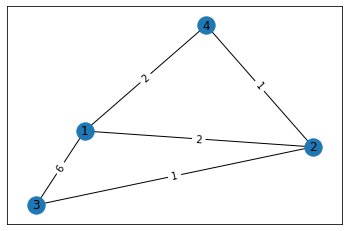

Cost of MST :  4
[]


NetworkXError: The node 0 is not in the graph.

In [1732]:
Start_a_star()